# Notebook for Analysis and Model Development

* **Team :** Data Crew

This is the corresponding jupyter notebook where the model will be developed and stored in order to make predictions on the data.

In [2]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Own Libraries
from utils import *

# Dictionary
from collections import defaultdict

sns.set_style('whitegrid')

## Data Concerns

### Reading data

In [3]:
data = pd.read_csv('../../1. Data/smaller_sample.csv')
event_defs = pd.read_csv('../../1. Data/Event+Definitions.csv')
data

,customer_id,account_id,stage,ed_id,event_name,event_timestamp,journey_steps_until_end,journey_id,milestone_number
0,2.787130e+08,-1812321640,Discover,2,campaign_click,2021-05-31 06:00:00,1,1.0,NaN
1,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:03,2,1.0,NaN
2,2.787130e+08,-1812321640,Apply for Credit,3,application_web_submit,2021-05-31 23:11:51,3,1.0,NaN
3,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:51,4,1.0,NaN
4,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:51,5,1.0,NaN
...,...,...,...,...,...,...,...,...,...
3246336,-1.948257e+09,-1123823706,First Purchase,5,view_cart,2023-08-29 02:45:54,28,1.0,NaN
3246337,-1.948257e+09,-1123823706,First Purchase,4,browse_products,2023-08-29 02:45:54,29,1.0,NaN
3246338,-1.948257e+09,-1123823706,First Purchase,11,add_to_cart,2023-08-29 02:45:54,30,1.0,NaN
3246339,-1.948257e+09,-1123823706,First Purchase,6,begin_checkout,2023-08-29 02:45:54,31,1.0,NaN


### Cleaning data

* Correcting the journey steps

* Applying the cleaning functions

In [4]:
df = fingerhut_data_cleaner(data, event_defs)
df

/Users/danielmalvaez/Library/CloudStorage/GoogleDrive-malvaez.axel@aries.iimas.unam.mx/My Drive/MacBook/Documentos/School/UC/UCLA/Courses/Winter/Experience-Data-Science/Project/STATSM148/Python-Files/utils.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['milestone_number'] = df['milestone_number'].fillna(0)


,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,milestone_number,stage
0,278713037,1812321640,2,campaign_click,2021-05-31 06:00:00,1,0.0,Discover
1,278713037,1812321640,19,application_web_view,2021-05-31 23:11:03,2,0.0,Apply for Credit
2,278713037,1812321640,3,application_web_submit,2021-05-31 23:11:51,3,0.0,Apply for Credit
3,278713037,1812321640,19,application_web_view,2021-05-31 23:11:51,4,0.0,Apply for Credit
4,278713037,1812321640,19,application_web_view,2021-05-31 23:11:54,5,0.0,Apply for Credit
...,...,...,...,...,...,...,...,...
2849137,1948257044,1123823706,11,add_to_cart,2023-08-28 18:50:58,8,0.0,First Purchase
2849138,1948257044,1123823706,5,view_cart,2023-08-29 02:45:54,9,0.0,First Purchase
2849139,1948257044,1123823706,4,browse_products,2023-08-29 02:45:54,10,0.0,First Purchase
2849140,1948257044,1123823706,11,add_to_cart,2023-08-29 02:45:54,11,0.0,First Purchase


* Verifying if the data is clean and the sequences are corrected.

In [5]:
has_correct_sequence(df['journey_steps_until_end'])

True

* Deleting promotion created event

In [6]:
idxs = list(df[df['event_name'] == 'promotion_created'].index)

# DROP THE INDEX OF THIS QUERY IN THE DATASET
df.drop(idxs, inplace=True)
df.reset_index(drop=True, inplace=True)

## Sequences (Obtaining sequences)

### Obtaining the sequences with the correct states

* Function for the sequences and the states

In [7]:
result_sequences = split_sequences(df)

* Assigning the probabilities for each state

In [8]:
result_sequences[0:3]

[[2, 19, 3, 19, 19, 3, 19, 19, 19, 3, 19, 12],
 [15],
 [19,
  19,
  19,
  19,
  19,
  19,
  3,
  19,
  19,
  19,
  3,
  12,
  4,
  11,
  4,
  4,
  4,
  11,
  4,
  4,
  5,
  4,
  4,
  11,
  5,
  5,
  5,
  6,
  4,
  4,
  5,
  4,
  4,
  11,
  5,
  4,
  11,
  5,
  4,
  5,
  6,
  7,
  8,
  29,
  4,
  4,
  4,
  11,
  4,
  4,
  11,
  5,
  27,
  5,
  4,
  5,
  4,
  5,
  5,
  6,
  6,
  28]]

### Distribution of the length of the sequences

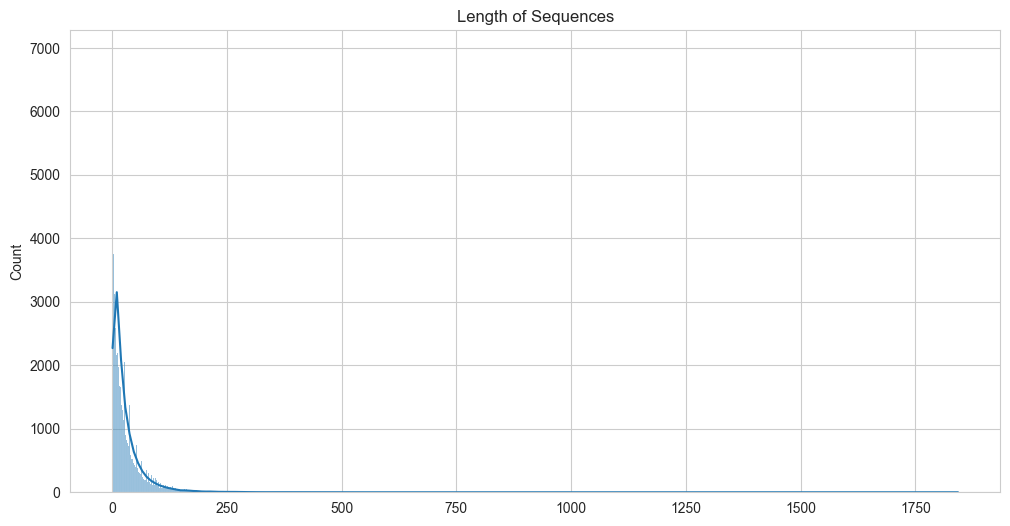

In [9]:
lengths = []
for seq in result_sequences:
    lengths.append(len(seq))
    
plt.figure(figsize=(12, 6))
sns.histplot(lengths, kde=True)
plt.title('Length of Sequences')
plt.show()

## Creating New Data Set for Binary Classification

* By making it suitable for clustering/analysis/classification of the customers without the explicit sequences

My proposal is to create a new dataset with the customer_ids where each instance corresponds to an only customer where the features are descriptive features about the sequences and the stages.

In [10]:
num_unique_cust = len(df['customer_id'].unique())
print(f'Number of unique customers: {num_unique_cust}')

Number of unique customers: 83282


Ideas of more features to be added:   
* Avg length of the sequence (avg in case has more than one, otherwise the length of the unique sequence) ✅
* Has more than one journey ✅
* Number of journeys ✅
* Has order shipped ✅
* Highest milestone reached ✅
* Has credit approved ✅
* Has first purchase ✅
* Has down payment ✅
* Has order shipped ✅
* max number of journey_steps_until_end ✅
* Most repeated event in the journey ✅
* Time between the application and first purchase, then time from the first purchase to down payment and then down payment to order shipped

* number of attempts (applying for a credit)
* Returning customer
* Has an ideal journey

#### Trying to use Dask for improving the vectorized operations and the parallelism

This particular library will be very useful in case we handle operations with the original data.

Ofc the following **benchmark** is designed thinking on the original data and not the sample, because as we may not parallelize the operations with very few data could be even slower or not worth it.

In [50]:
import dask.dataframe as dd
import time
# import dask.array as da

df_dask = dd.from_pandas(df, npartitions=4)

# Testing the parallel computation
time_init = time.time()
result = df_dask['journey_steps_until_end'] * df_dask['ed_id'].sum()  # Compute sum(x * y) in parallel
time_end = time.time()

print(result.compute())
print(f'Time: {time_end - time_init}')

0           22410676
1           44821352
2           67232028
3           89642704
4          112053380
             ...    
2506807    179285408
2506808    201696084
2506809    224106760
2506810    246517436
2506811    268928112
Name: journey_steps_until_end, Length: 2506812, dtype: int64
Time: 0.0008029937744140625


In [44]:
time_init = time.time()
result = df['journey_steps_until_end'] * df['ed_id'].sum()  # Compute sum(x * y) in parallel
time_end = time.time()

print(result)
print(f'Time: {time_end - time_init}')

0           22410676
1           44821352
2           67232028
3           89642704
4          112053380
             ...    
2506807    179285408
2506808    201696084
2506809    224106760
2506810    246517436
2506811    268928112
Name: journey_steps_until_end, Length: 2506812, dtype: int64
Time: 0.004622697830200195


#### New Data Set Creation

The following are the functions required in order to construct the new data set for the binary classification...

In [51]:
# Function for repeated values in a list returns a boolean
def has_more_one_journey(j_steps):
    """Function to check if a sequence has repeated values

    Args:
        seq (list): List of values

    Returns:
        bool: True if there are repeated values, False otherwise
    """
    return len(j_steps) != len(set(j_steps))

def number_journeys_and_max_2(cus_df):
    """Function to add the number of journeys and the maximum number of journeys to the dataset

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        pd.DataFrame: Dataset with the number of journeys and the maximum number of journeys in a new column
    """
    new_df = cus_df.copy()
    new_df['has_more_one_journey'] = new_df['journey_steps_until_end'].apply(has_more_one_journey)
    return new_df['has_more_one_journey'].sum(), max(new_df['journey_steps_until_end'])

def average_length_seq(cust_df):
    """Function to add the average length of the sequences to the dataset

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        pd.DataFrame: Dataset with the average length of the sequences in a new column
    """
    new_df = cust_df.copy()
    # Split the sequences
    sequences = split_sequences(new_df)
    return np.mean([len(seq) for seq in sequences])

def number_accounts(cust_df):
    """Function to add the number of accounts to the dataset

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        pd.DataFrame: Dataset with the number of accounts in a new column
    """
    return len(set(cust_df['account_id']))

def has_discover(cust_df):
    """Function to check if a sequence has the discovery event

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        bool: True if the sequence has the discovery event, False otherwise
    """
    return 'Discover' in list(cust_df['stage'])

def which_milestones(cust_df):
    """Function that returns in a tuple in the following sequence the next statemens:
    - If the customer has applied for credit and it has been approved (milestone 1)
    - If the customer has first purchase (milestone 2)
    - If the customer has account activitation (milestone 3)
    - If the customer has downpayment received (milestone 4)
    - If the customer has downpayment cleared (milestone 5)
    - If the customer has order shipped (milestone 6)

    Args:
        cust_df (_type_): _description_
    """
    milestones = set(cust_df['milestone_number'].unique())
    max_milestone = max(milestones)
    return (1 in milestones, 2 in milestones, 3 in milestones, 4 in milestones, 5 in milestones, 6 in milestones), max_milestone

def most_repeated_event(cust_df):
    """Function that returns the most repeated event in a sequence

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        str: The most repeated event in the sequence
    """
    return cust_df['event_name'].mode()[0]

* 1. Groupby Approach: 

    Consider using the groupby approach mentioned in the previous response for functions like number_journeys_and_max, has_order_shipped, has_discover, and which_milestones. This avoids repeated filtering and improves efficiency.

In [ ]:
def group_by_approach(cust_df):
    

In [53]:
number_journeys_and_max

<function __main__.number_journeys_and_max(cus_df)>

In [52]:
df.groupby('customer_id').apply(number_journeys_and_max)

customer_id
5414          (1, 27)
26746          (1, 5)
43085         (1, 30)
61659          (1, 7)
67034         (1, 22)
               ...   
2147283220    (1, 12)
2147340717    (1, 11)
2147417277    (1, 15)
2147445537    (1, 32)
2147454032    (1, 13)
Length: 83282, dtype: object

* 2. Vectorized Operations:

    For average_length_seq, explore vectorized operations like np.mean on the entire 'journey_steps_until_end' column after splitting sequences, rather than iterating through individual sequences. For number_accounts, use nunique instead of set conversion and length calculation.

* 3. Efficiency within Functions: 
    
    In has_order_shipped, replace 28 in set(cus_df['ed_id']) with cus_df['ed_id'].isin([28]). This is more efficient for checking membership. In most_repeated_event, use mode directly on the entire 'event_name' column instead of iterating.

In [13]:
df[df['customer_id'] == 1694568649]['event_name'].mode()[0]

'browse_products'

In [15]:
import time

n_cols = 16
n_customers = len(df['customer_id'].unique())
customers_ids = df['customer_id'].unique()

new_data_set = [[0]*n_cols for _ in range(n_customers)]


time1 = time.time()
for i, cus_id in enumerate(customers_ids):
    # Obtain the dataset of a certain customer
    cus_df = df[df['customer_id'] == cus_id]
    new_data_set[i][0] = cus_id
    new_data_set[i][1] = has_more_one_journey(cus_df['journey_steps_until_end'].tolist())
    number_journeys, max_journey = number_journeys_and_max(cus_df)
    new_data_set[i][2] = number_journeys
    new_data_set[i][3] = max_journey
    new_data_set[i][4] = has_order_shipped(cus_df)
    new_data_set[i][5] = average_length_seq(cus_df)
    new_data_set[i][6] = number_accounts(cus_df)
    new_data_set[i][7] = has_discover(cus_df)
    milestones, max_milestone = which_milestones(cus_df)
    new_data_set[i][8] = milestones[0]
    new_data_set[i][9] = milestones[1]
    new_data_set[i][10] = milestones[2]
    new_data_set[i][11] = milestones[3]
    new_data_set[i][12] = milestones[4]
    new_data_set[i][13] = milestones[5]
    new_data_set[i][14] = max_milestone
    new_data_set[i][15] = most_repeated_event(cus_df)
    print(i)

time2 = time.time()
print('Time: ', time2 - time1)
    
    
    # print(f'Customer {cus_id}')
    # print(f'Does the customer {cus_id} has more than one journey? R - {has_more_one_journey(cus_df)}')
    # print('Number of journeys this customer has : ', number_journeys_and_max(cus_df)[0])
    # print('Max journey this customer has : ', number_journeys_and_max(cus_df)[1])
    # print('Has order shipped : ', has_order_shipped(cus_df))
    # print('Average length of the sequences : ', average_length_seq(cus_df))
    # print('Number of accounts : ', number_accounts(cus_df))
    # print('Has Discover : ', has_discover(cus_df))
    
    # milestones, max_milestone = which_milestones(cus_df)
    # print('Has applied for credit - approved : ', milestones[0])
    # print('Has first purchase : ', milestones[1])
    # print('Has account activation : ', milestones[2])
    # print('Has downpayment received : ', milestones[3])
    # print('Has downpayment cleared : ', milestones[4])
    # print('Has order shipped : ', milestones[5])    
    # print('Max milestone : ', max_milestone)
    # print('Most repeated event : ', most_repeated_event(cus_df))
    # break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [ ]:
new_data_set = np.array(new_data_set)
# Data Frame
columns = ['customer_id', 'has_more_one_journey', 'number_journeys', 'max_journey', 'has_order_shipped', 'average_length_seq', 'number_accounts', 'has_discover', 'has_applied_for_credit_approved', 'has_first_purchase', 'has_account_activation', 'has_downpayment_received', 'has_downpayment_cleared', 'has_order_shipped', 'max_milestone', 'most_repeated_event']
new_df = pd.DataFrame(new_data_set, columns=columns)
new_df.to_csv('new_dataset.csv', index=False)

## Trying Darren Final Dataset

In [ ]:
data = pd.read_csv('../../1. Data/smaller_sample.csv')
event_defs = pd.read_csv('../../1. Data/Event+Definitions.csv')
# data.customer_id = list(range(0, len(data)))
df = fingerhut_data_cleaner(data, event_defs)

idxs = list(df[df['event_name'] == 'promotion_created'].index)
df.drop(idxs, inplace=True)
df.reset_index(drop=True, inplace=True)

def add_downpayment_cleared(df):
    downpaymen_cleared = df.groupby('customer_id')['ed_id'].apply(lambda x: 27 in x.values).reset_index(name='downpayment_cleared')
    return pd.merge(df, downpaymen_cleared, on='customer_id')

df = add_n_accounts(df)
df = add_has_discover(df)
df = add_downpayment_cleared(df)

# Filter customers with at least 10 events and downpayment not cleared in the first 10 events.
# Want to see if models can predict whether or not a customer clears downpayment by only looking
# at first 10 actions.

df = df.sort_values(
        ['customer_id', 'journey_steps_until_end']
    ).groupby(['customer_id'], sort=False).agg(
        {
            'ed_id': lambda x: list(x)[:10],
            'journey_steps_until_end': lambda x: list(x)[-1],
            'has_discover': 'first',
            'downpayment_cleared': 'first',
            'n_accounts': 'first',
        }
)

df = df[df.ed_id.apply(lambda x: len(x) == 10)]

df = df.reset_index()

idx = df[df.ed_id.apply(lambda x: 27 in x)].index
df.drop(idx, inplace=True)

df_X = df.drop(columns=['downpayment_cleared', 'customer_id'])
target = df.downpayment_cleared.astype(int)

KeyboardInterrupt: 

In [ ]:
df_X

,ed_id,journey_steps_until_end,has_discover,n_accounts
0,"[21, 12, 4, 2, 4, 11, 4, 11, 5, 4]",27,True,1
1,"[29, 2, 12, 4, 4, 4, 11, 4, 4, 11]",30,True,1
2,"[2, 19, 19, 19, 19, 3, 19, 12, 19, 4]",22,True,1
3,"[19, 19, 19, 19, 19, 19, 19, 19, 19, 3]",114,False,1
4,"[19, 19, 19, 19, 3, 19, 19, 19, 19, 19]",23,False,1
...,...,...,...,...
57065,"[2, 12, 4, 11, 4, 4, 5, 5, 4, 4]",15,True,1
57066,"[2, 12, 24, 4, 24, 4, 11, 24, 4, 4]",35,True,1
57067,"[12, 4, 4, 4, 4, 4, 4, 4, 4, 2]",12,True,1
57068,"[12, 6, 11, 5, 4, 19, 3, 6, 11, 5]",15,False,1


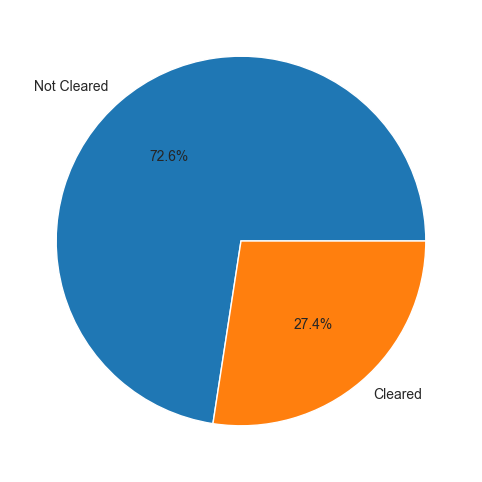

In [ ]:
# Proportion of the target
plt.figure(figsize=(12, 6))
plt.pie(target.value_counts(), labels=['Not Cleared', 'Cleared'], autopct='%1.1f%%')
plt.show()

## Models proposed for probabilities/prediction of the events

* Markov Chain (probs) - Dan & Axel
* Hidden Markov Model (probs) - Dan & Axel
* LSTM for prediction on the next state - TARO

### Markov Chain for probabilities

#### Transition Matrix

* Defining the transition matrix

In [ ]:
# This is going to be our transition matrix
# It will be a dictionary of dictionaries
probs = {}

# Estimation of the transition probabilities
for seq in result_sequences:
    for i in range(len(seq) - 1):
        current_state = seq[i]
        next_state = seq[i + 1]
        
        if current_state == 1:
            print('warning at', i)

        if current_state not in probs:
            # Default dict to add withour checking if the key exists
            probs[current_state] = defaultdict(float)

        probs[current_state][next_state] += 1

probs

{2: defaultdict(float,
             {19: 7741.0,
              12: 20960.0,
              4: 6708.0,
              5: 1647.0,
              3: 459.0,
              27: 265.0,
              22: 3808.0,
              23: 20.0,
              6: 796.0,
              21: 1138.0,
              24: 1565.0,
              29: 468.0,
              13: 425.0,
              2: 244.0,
              8: 39.0,
              11: 328.0,
              18: 61.0,
              15: 16.0,
              26: 11.0,
              28: 6.0,
              10: 1.0,
              7: 12.0}),
 19: defaultdict(float,
             {3: 52971.0,
              19: 210885.0,
              12: 15636.0,
              4: 13907.0,
              5: 3120.0,
              11: 653.0,
              6: 1202.0,
              2: 2372.0,
              24: 1444.0,
              7: 52.0,
              21: 1921.0,
              29: 339.0,
              13: 459.0,
              15: 37.0,
              22: 110.0,
              28: 63.0,
     

* Now we normalize these counts to obtain the probabilities (i.e. values between 0 and 1 that sum to 1)

In [ ]:
for state in probs:
    # Obtain the total of transitions for this certain state
    total_transitions = sum(probs[state].values())
    
    # Now for each next state that has a connection with the current state, we obtain
    # the number of transitions and divide it by the total transitions to obtain the probability
    for next_state in probs[state]:
        probs[state][next_state] /= total_transitions

In [ ]:
try:
    probs[1]
except KeyError:
    print('No state 1 - this should be the case otherwise we have a problem with the event promotion_created')

No state 1 - this should be the case otherwise we have a problem with the event promotion_created


* Verify if the probabilities are correct

In [ ]:
for state in probs:
    summ = sum(probs[state].values())
    if summ != 1:
        print(f'State {state} sum', summ)

State 4 sum 0.9999999999999999
State 6 sum 0.9999999999999999
State 29 sum 0.9999999999999998
State 27 sum 0.9999999999999999
State 21 sum 0.9999999999999999
State 15 sum 1.0000000000000002
State 18 sum 0.9999999999999999
State 20 sum 0.9999999999999999
State 10 sum 0.9999999999999999


#### Predicting the next state

* Simple and basic prediction of the next state

In [ ]:
def predict_next_state(current_state):
    """Function to predict the next state given the current state

    Args:
        current_state (int): Current state of the user

    Returns:
        int: Next state of the user
    """
    if current_state in probs:
        next_states = list(probs[current_state].keys())
        probabilities = list(probs[current_state].values())
        
        # Randomly select the next state given the probabilities
        predicted_state = np.random.choice(next_states, p=probabilities)
        
        return predicted_state
    else:
        print('State not found in the existing events.')
        return None

* Example for predicting the next state

In [ ]:
# There should not be any state 1
probs.keys()

dict_keys([2, 19, 3, 12, 4, 11, 5, 6, 7, 8, 29, 27, 24, 21, 22, 15, 23, 26, 28, 13, 18, 20, 16, 10, 14])

In [ ]:
current_state = 2
predicted_state = predict_next_state(current_state)

current_event_name = event_defs[event_defs['event_definition_id'] == current_state]['event_name'].values[0]
predicted_event_name = event_defs[event_defs['event_definition_id'] == predicted_state]['event_name'].values[0]

print(f"Given the event {current_event_name}, the next event the user will go is {predicted_event_name}")

Given the event campaign_click, the next event the user will go is application_web_approved


Note : Verify if tthe prediction arises a problem

## Analysis

The following analysis is pending to be done.

Good ideas for further analysis:

* Go further in the analysis in the people that had applied for a credit and did not get it

* Figure out if we add rows with the same event name in a very small (but different) time difference (e.g. 1 second) to the dropping criteria. Example:

## Model (Clustering or Association Rules)

(Clustering for the customers or finding patterns in the data with some association rulel algorithms)

Second approach for the model. Predict if a customer will 